<a href="https://colab.research.google.com/github/correamv/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_da_Cidade_de_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-06-22/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de ID gerado para identificar o imóvel.
* `name` - Nome do imóvel anunciado.
* `host_id` - Número de ID gerado para identificar o host do imóvel.
* `neighbourhood_group` - Esta variável não contem valores válidos. 
* `neighbourhood` -  Bairro em que está localizado a propriedade.
* `latitude` - Latitude que está localizada a propriedade.
* `longitude` - Longitude que está localizada a propriedade.
* `room_type` - Tipo de imóvel que está sendo anunciado.
* `price` - Valor de locação de uma noite do imóvel.
* `minimum_nights` - Quantidade mínima de noites para alugar.
* `number_of_reviews` - Quantidade de reviews da propriedade
* `last_review` - Data da última avaliação da propriedade
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis que o host tem na região.
* `availability_365` - Número de dias ainda disponíveis para alugar o imóvel.
* `number_of_reviews_ltm` - Número de reviews que o imóvel teve nos últimos 12 meses.
* `license` - Número da licença do imóvel.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,639280827847650582,Lugar encantador en vicente lopez,461943087,Roberto,NaN,Nuñez,-34.52618,-58.48117,Entire home/apt,2880,1,0,NaN,NaN,1,364,0,NaN
1,33712571,Ambiente familiar....tranquilo,187744857,Griselda,NaN,Villa Lugano,-34.68885,-58.50478,Entire home/apt,1230,2,0,NaN,NaN,1,89,0,NaN
2,32934967,"Habitacion para viajeros, estudiantes",247809450,Sebastian,NaN,Mataderos,-34.68112,-58.51895,Private room,3697,15,0,NaN,NaN,1,365,0,NaN
3,42042076,Hotel Vicente Lopez,183363682,Bernardo,NaN,Nuñez,-34.52638,-58.47069,Private room,5500,1,6,2021-10-10,0.21,2,73,1,NaN
4,33424822,Departamento de 2 ambientes frente al río,36564453,Sandra,NaN,Nuñez,-34.51730,-58.47505,Entire home/apt,1915,15,3,2021-07-24,0.21,15,205,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e quantas entradas temos em nosso dataset e o tipo de dados em cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com mais entradas e variáveis (listings.csv.gz).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)



Entradas:	 16195
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de dum dataset está diretamente ligada a quantidade de valores ausentes. É importante entender logo no início, se esses valores nulos são significativos comparado ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% de valores ausentes.
* A variável `license` possui valores nulos em 97% das entradas.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase um terço das entradas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.979315
reviews_per_month                 0.217783
last_review                       0.217783
name                              0.000247
host_name                         0.000123
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição de variáveis irei plotar um histograma.

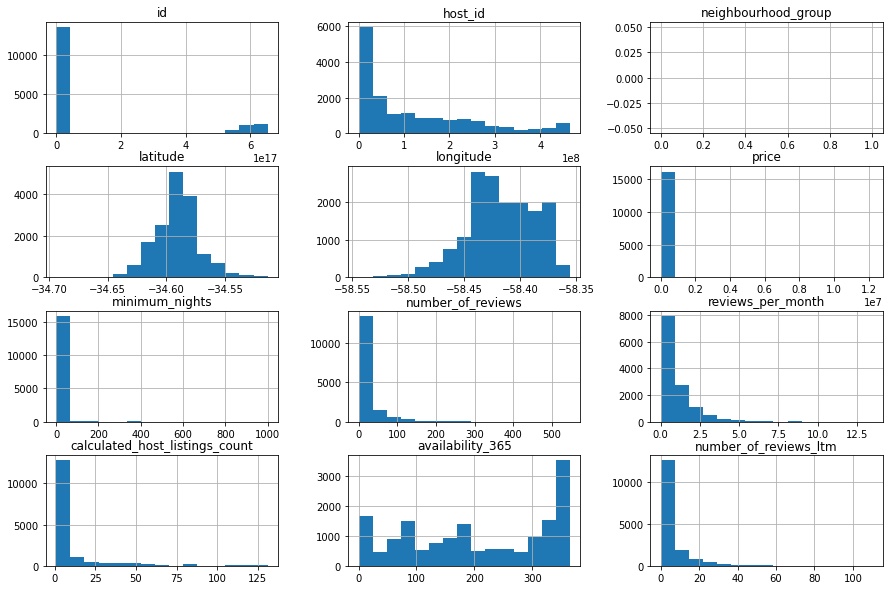

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Antes de calcular a média de preços para os aluguéis, vemos pelo histograma acima que há indícios da presença de outliers, especialmente nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. 

Para confimar utilizarei o método `describe()`, para colher um resumo estatístico das variáveis numéricas.

In [ ]:
# ver a média da coluna `price``
#função lambda serve apenas para transformar o resultado do describe, de notação científica, para o formato convencional.
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16195.00000,16195.00000,16195.00000,12668.00000,16195.00000,16195.00000
mean,9657.85236,7.96073,20.62470,0.93338,10.36647,205.29991
std,115901.23582,29.58571,37.48597,1.03757,22.01008,124.77829
min,260.00000,1.00000,0.00000,0.01000,1.00000,0.00000
25%,3345.00000,2.00000,1.00000,0.21000,1.00000,89.00000
50%,4806.00000,3.00000,6.00000,0.58000,2.00000,194.00000
75%,7394.00000,5.00000,23.00000,1.28000,7.00000,333.00000
max,12199937.00000,1000.00000,546.00000,13.47000,131.00000,365.00000


Com o resumo acima, podemos confirmar algumas hipóteses, como :
* A variável price possui 75% do valor abaixo de 7394, porém seu valor máximo é 12199937.
*A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

####Boxplot para minimum_nights

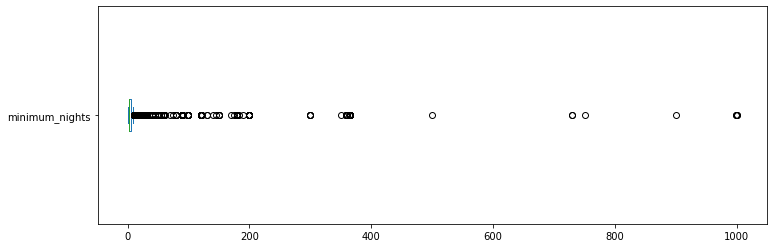

minimum_nights: valores acima de 30:
369 entradas
2.2785%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(12,4))
plt.show()
#ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))



#### Boxplot para Price

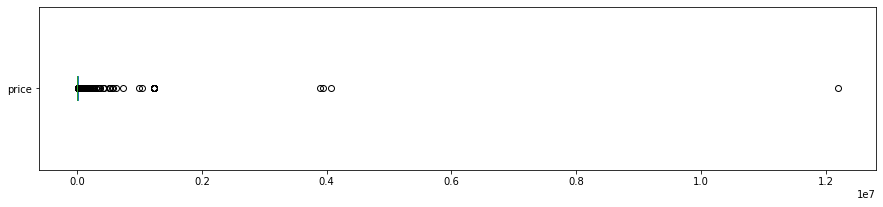


price: valores acima de 1500
583 entradas
3.5999%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 20000])))
print("{:.4f}%".format((len(df[df.price > 20000]) / df.shape[0]) * 100))

#### Histograma sem outliers
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.


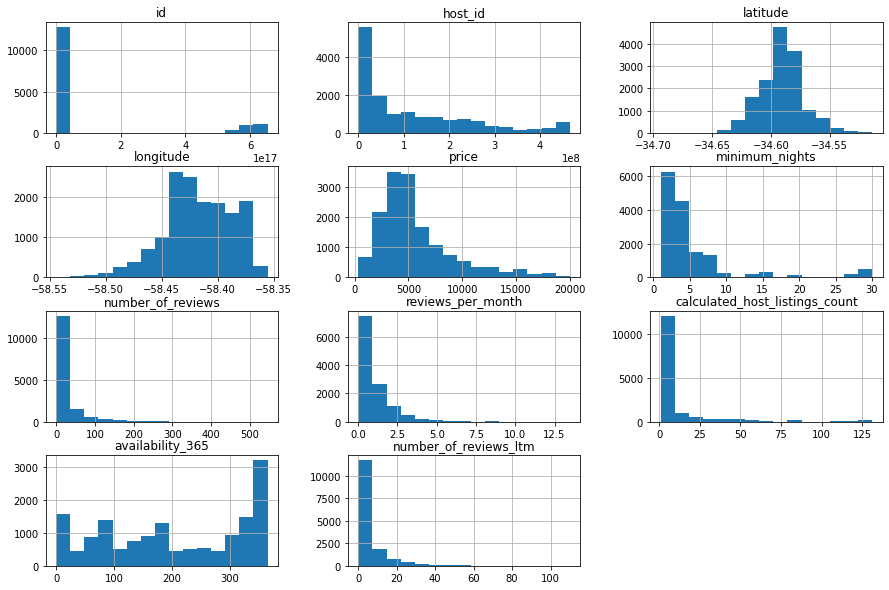

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 20000].index, axis=0, inplace= True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover neighbourhood_group e license pois estão com a maior parte de valores vazios
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

#plotar histograma com as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.042066,-0.064508,-0.050650,0.135303,0.092727
minimum_nights,-0.042066,1.000000,-0.100701,-0.211592,0.012561,-0.023379
number_of_reviews,-0.064508,-0.100701,1.000000,0.405752,-0.065357,-0.041271
reviews_per_month,-0.050650,-0.211592,0.405752,1.000000,0.077997,0.042249
calculated_host_listings_count,0.135303,0.012561,-0.065357,0.077997,1.000000,0.056164
availability_365,0.092727,-0.023379,-0.041271,0.042249,0.056164,1.000000


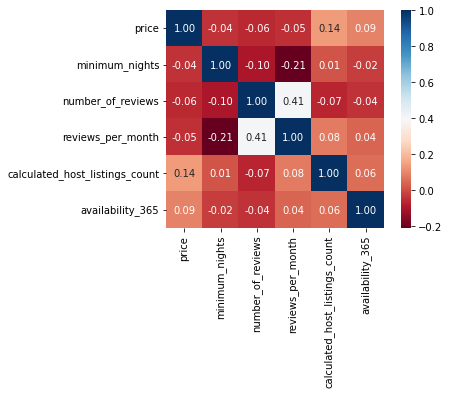

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13059
Private room        1919
Shared room          182
Hotel room           106
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print((df_clean.room_type.value_counts() / df_clean.shape[0]) * 100)

Entire home/apt    85.543037
Private room       12.570418
Shared room         1.192192
Hotel room          0.694353
Name: room_type, dtype: float64


Vemos acima que 85,54% dos alugueis em Buenos Aires, são de casas ou apartamentos inteiros.

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dique 1          12161.500000
Puerto Madero    11298.039773
Dique 2          11038.062500
Dique 4           9950.750000
Dique 3           9700.000000
Villa Soldati     6791.000000
Floresta          6482.909091
Palermo           6449.169757
Retiro            6021.007989
Villa Devoto      6012.718750
Name: price, dtype: float64

Vemos que bairros como Dique 1, Dique 2 e etc, estão com preços médios acima de bairros turísticos conhecidos de Buenos Aires. O que pode indicar que estes bairros possuem pouca disponibilidade de imóveis para aluguel.

In [ ]:
df_clean.neighbourhood[df_clean.neighbourhood == 'Dique 1'].value_counts()

Dique 1    4
Name: neighbourhood, dtype: int64

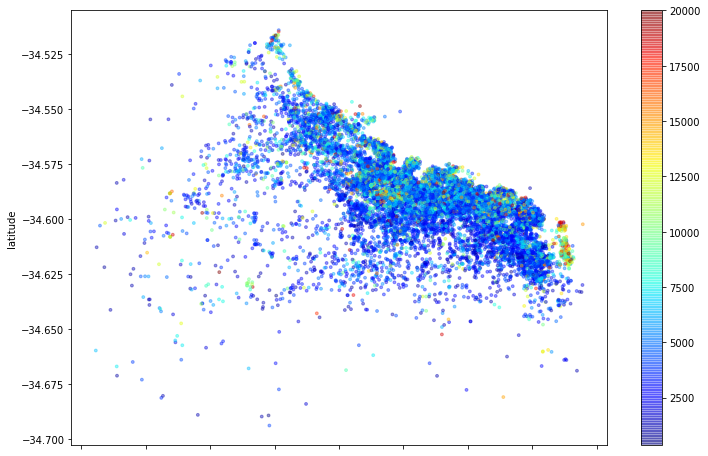

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print('Média do mínimo de noites para alugar: {:.2f}'.format(df_clean['minimum_nights'].mean()))

Média do mínimo de noites para alugar: 4.98


## Conclusões

Neste documento realizei uma análise dos dados resumidos do Airbnb para a cidade de Buenos Aires. 

Percebe-se a que existem outliers que devem ser tratados para fornecer uma visão mais limpa dos dados.

Deve-se tomar cuidado também com o uso de médias, pois existem localizações que possuem pouquíssimos imóveis, o que pode distorcer a visão.

